In [51]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn


In [52]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [ ]:
data = pd.read_csv('accident.csv')

In [ ]:
data.shape

(26270, 22)

In [ ]:
data.info() # 사람과의 사고가 아닌 경우 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26270 entries, 0 to 26269
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        26270 non-null  int64 
 1   사고일시        26270 non-null  object
 2   요일          26270 non-null  object
 3   시군구         26270 non-null  object
 4   사고내용        26270 non-null  object
 5   사망자수        26270 non-null  int64 
 6   중상자수        26270 non-null  int64 
 7   경상자수        26270 non-null  int64 
 8   부상신고자수      26270 non-null  int64 
 9   사고유형        26270 non-null  object
 10  법규위반        26270 non-null  object
 11  노면상태        26270 non-null  object
 12  기상상태        26270 non-null  object
 13  도로형태        26270 non-null  object
 14  가해운전자 차종    26270 non-null  object
 15  가해운전자 성별    26270 non-null  object
 16  가해운전자 연령    26270 non-null  object
 17  가해운전자 상해정도  26270 non-null  object
 18  피해운전자 차종    24900 non-null  object
 19  피해운전자 성별    24900 non-null  object
 20  피해운전자 

In [ ]:
data.loc[:, '사망자수':'부상신고자수'].describe()

,사망자수,중상자수,경상자수,부상신고자수
count,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.009707,0.322840,1.291930,0.105482
std,0.103339,0.602095,1.161879,0.383364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000
max,3.000000,7.000000,30.000000,8.000000


In [ ]:
data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상


In [ ]:
data['사고일시'] = pd.to_datetime(data['사고일시'], format='%Y년 %m월 %d일 %H시')
data['사고날짜'] = data['사고일시'].dt.date
data['사고시간'] = data['사고일시'].dt.time

data.T

,0,1,2,3,4,5,6,7,8,9,...,26260,26261,26262,26263,26264,26265,26266,26267,26268,26269
사고번호,2014010100100005,2014010100100029,2014010100100050,2014010100100053,2014010100100054,2014010100100104,2014010100100116,2014010100100156,2014010100100158,2014010100100159,...,2023122900100592,2023122900100594,2023122900100654,2023122900100677,2023123000100030,2023123000100050,2023123000100220,2023123000100222,2023123100100170,2023123100100256
사고일시,2014-01-01 00:00:00,2014-01-01 01:00:00,2014-01-01 02:00:00,2014-01-01 02:00:00,2014-01-01 02:00:00,2014-01-01 04:00:00,2014-01-01 05:00:00,2014-01-01 07:00:00,2014-01-01 07:00:00,2014-01-01 07:00:00,...,2023-12-29 20:00:00,2023-12-29 20:00:00,2023-12-29 22:00:00,2023-12-29 23:00:00,2023-12-30 02:00:00,2023-12-30 05:00:00,2023-12-30 13:00:00,2023-12-30 13:00:00,2023-12-31 15:00:00,2023-12-31 19:00:00
요일,수요일,수요일,수요일,수요일,수요일,수요일,수요일,수요일,수요일,수요일,...,금요일,금요일,금요일,금요일,토요일,토요일,토요일,토요일,일요일,일요일
시군구,서울특별시 구로구 오류동,서울특별시 성동구 마장동,서울특별시 광진구 광장동,서울특별시 구로구 개봉동,서울특별시 양천구 목동,서울특별시 서초구 방배동,서울특별시 관악구 신림동,서울특별시 관악구 신림동,서울특별시 송파구 석촌동,서울특별시 노원구 상계동,...,서울특별시 강서구 방화동,서울특별시 노원구 상계동,서울특별시 마포구 합정동,서울특별시 성동구 성수동2가,서울특별시 송파구 가락동,서울특별시 은평구 응암동,서울특별시 동대문구 휘경동,서울특별시 송파구 잠실동,서울특별시 은평구 불광동,서울특별시 서초구 방배동
사고내용,부상신고사고,중상사고,중상사고,경상사고,경상사고,경상사고,중상사고,중상사고,사망사고,경상사고,...,부상신고사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고,경상사고
사망자수,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
중상자수,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
경상자수,0,3,0,2,2,2,2,3,0,1,...,0,1,2,1,1,1,1,2,4,4
부상신고자수,2,0,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
사고유형,차대차 - 기타,차대차 - 기타,차대차 - 추돌 - 진행중,차대차 - 기타,차대차 - 측면직각충돌,차대차 - 추돌 - 주정차중,차대차 - 정면충돌,차대차 - 정면충돌,차대차 - 기타,차대차 - 측면직각충돌,...,차대차 - 기타,차대차 - 추돌,차대차 - 추돌,차대차 - 정면충돌,차대차 - 추돌,차대사람 - 차도통행중,차대차 - 정면충돌,차대차 - 추돌,차대차 - 추돌,차대차 - 측면충돌


In [ ]:
data['사고연도'] = data['사고일시'].dt.year
data['사고월'] = data['사고일시'].dt.month
data['사고일'] = data['사고일시'].dt.day

In [ ]:
data['사고월'].value_counts()

사고월
12    2409
11    2407
1     2209
10    2207
4     2194
9     2179
5     2171
7     2154
6     2128
8     2098
3     2083
2     2031
Name: count, dtype: int64

In [ ]:
data['사고일'].value_counts()

사고일
15    928
23    921
3     901
17    887
29    884
21    879
22    877
13    876
27    872
25    868
12    867
9     863
16    860
1     860
30    856
5     855
18    851
7     851
11    848
28    847
24    846
8     845
4     845
26    834
20    833
10    830
19    829
14    825
6     808
2     808
31    516
Name: count, dtype: int64

In [ ]:
data['사고시간'].value_counts()

사고시간
23:00:00    2892
00:00:00    2642
22:00:00    2620
01:00:00    2203
21:00:00    1944
02:00:00    1837
03:00:00    1453
04:00:00    1269
05:00:00    1167
20:00:00    1165
06:00:00    1022
19:00:00     880
07:00:00     848
18:00:00     696
08:00:00     685
17:00:00     487
09:00:00     461
16:00:00     368
10:00:00     363
15:00:00     323
11:00:00     260
13:00:00     250
14:00:00     233
12:00:00     202
Name: count, dtype: int64

In [ ]:
data['도로형태'].value_counts()

도로형태
단일로 - 기타           14334
교차로 - 교차로부근         5629
교차로 - 교차로안          3587
기타 - 기타             1154
단일로 - 교량             432
단일로 - 횡단보도부근         209
교차로 - 교차로횡단보도내       203
단일로 - 터널             184
단일로 - 지하차도(도로)내      159
단일로 - 횡단보도상          141
단일로 - 고가도로위          134
미분류 - 미분류             75
주차장 - 주차장             29
Name: count, dtype: int64

In [ ]:
data['사고유형'].value_counts()

사고유형
차대차 - 추돌             8898
차대차 - 기타             3739
차대차 - 측면충돌           3339
차대차 - 정면충돌           1756
차대차 - 추돌 - 주정차중      1685
차대차 - 추돌 - 진행중       1461
차대차 - 측면직각충돌         1410
차대사람 - 기타            1094
차대사람 - 횡단중            686
차량단독 - 공작물충돌          577
차량단독 - 기타             390
차량단독 - 전도전복           230
차대차 - 후진중충돌           222
차량단독 - 전도전복 - 전도      207
차대사람 - 차도통행중          191
차대사람 - 길가장자리구역통행중     177
차대사람 - 보도통행중          174
차량단독 - 전도전복 - 전복       11
차량단독 - 주차차량충돌           8
차량단독 - 도로외이탈 - 기타       7
차량단독 - 주/정차차량 충돌        5
차량단독 - 도로외이탈 - 추락       3
Name: count, dtype: int64

In [ ]:
data['요일'].value_counts()

요일
토요일    4868
금요일    4023
일요일    3889
목요일    3853
수요일    3425
화요일    3360
월요일    2852
Name: count, dtype: int64

In [ ]:
data['법규위반'].value_counts()

법규위반
안전운전불이행      19689
안전거리미확보       1978
신호위반          1977
중앙선침범         1376
기타             455
보행자보호의무위반      241
차로위반           177
교차로운행방법위반      167
직진우회전진행방해       93
불법유턴            61
과속              56
Name: count, dtype: int64

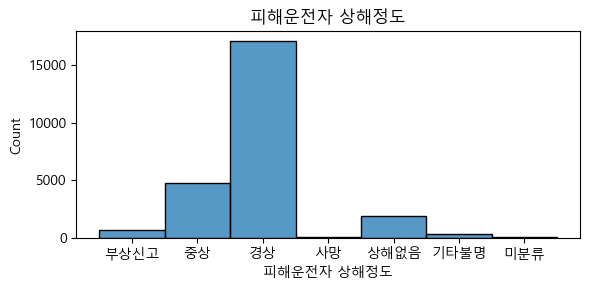

In [ ]:
# 피해운전자 상해 정도의 분포
plt.figure(figsize=(6, 3))
sns.histplot(data['피해운전자 상해정도'])
plt.title('피해운전자 상해정도')
plt.tight_layout()
plt.show()

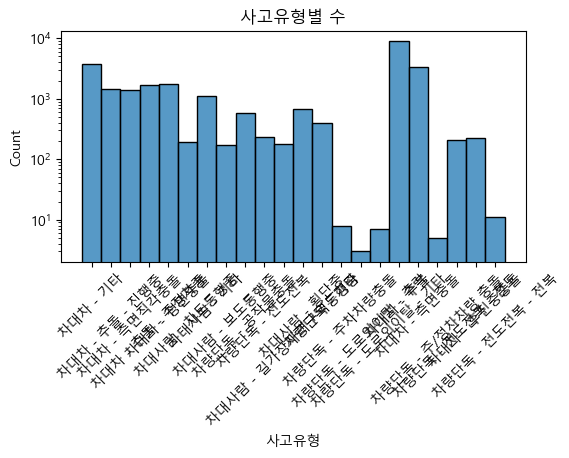

In [53]:
# 사고유형별 어떤 분포인지(막대그래프)
fig = plt.figure(figsize=(6,3))
sns.histplot(data['사고유형'])
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('사고유형별 수')
plt.show()

In [ ]:
data['accident_type'] = data['사고유형'].apply(lambda x: x.split()[0])

In [ ]:
# 사고유형별 어떤 분포인지(막대그래프)
fig = plt.figure(figsize=(6,3))
sns.histplot(data['사고유형'])
plt.xticks(rotation=45)
plt.title('사고유형별 수')
plt.show()

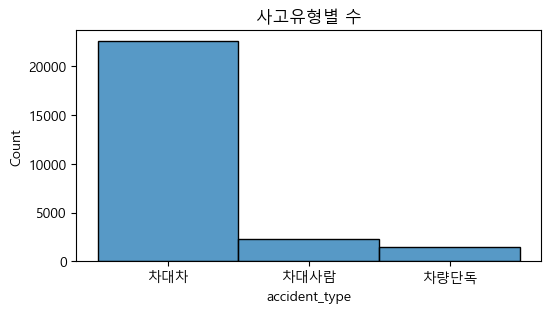

In [ ]:
# 단순 사고유형별 어떤 분포인지(막대그래프)
fig = plt.figure(figsize=(6,3))
sns.histplot(data['accident_type'])
plt.title('사고유형별 수')
plt.show()

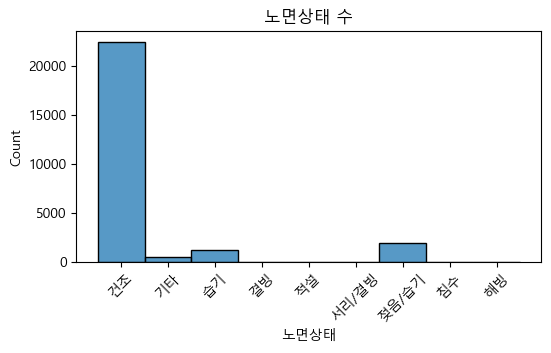

In [ ]:
# 노면상태별 어떤 분포인지(막대그래프)
fig = plt.figure(figsize=(6,3))
sns.histplot(data['노면상태'])
plt.xticks(rotation=45)
plt.title('노면상태 수')
plt.show()

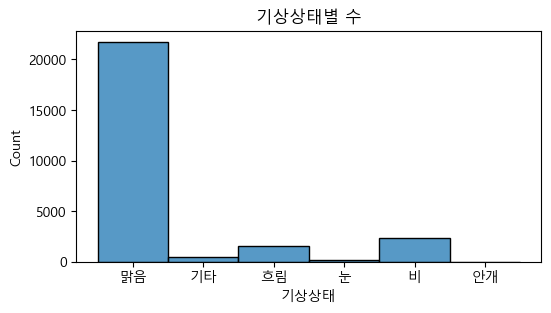

In [ ]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data['기상상태'])
plt.title('기상상태별 수')
plt.show()

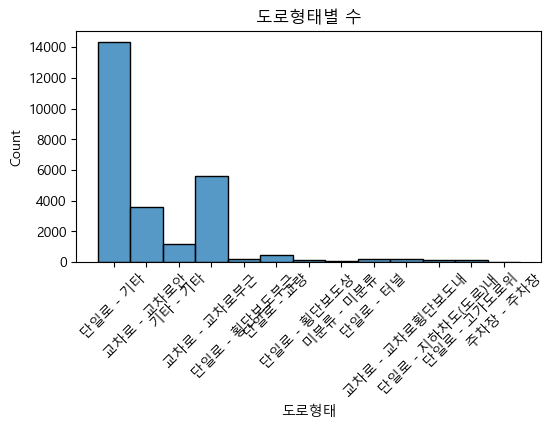

In [ ]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data['도로형태'])
plt.xticks(rotation=45)
plt.title('도로형태별 수')
plt.show()

In [ ]:
data['road_type'] = data['도로형태'].apply(lambda x: x.split()[0])

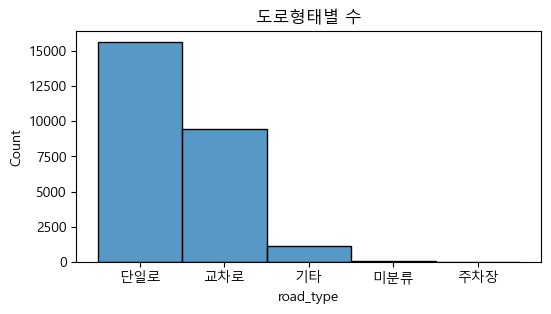

In [ ]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data['road_type'])
plt.title('도로형태별 수')
plt.show()

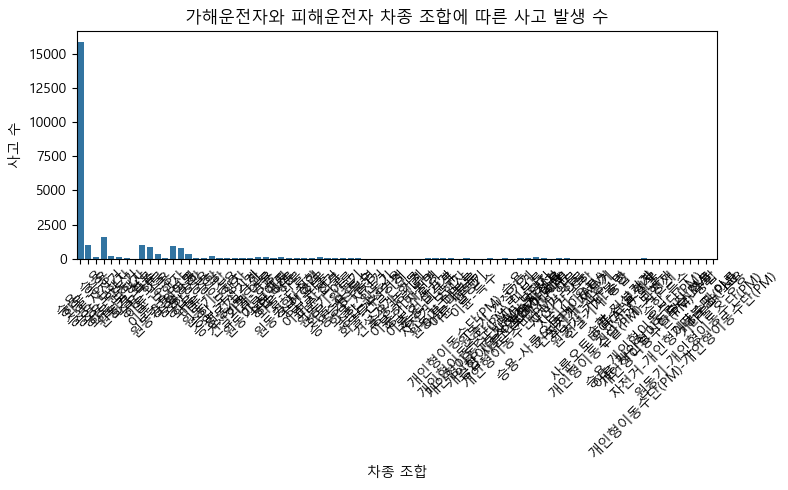

In [ ]:
# 차종 조합 그래프
plt.figure(figsize=(8, 5))
sns.countplot(x='차종 조합', data=data)
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title('가해운전자와 피해운전자 차종 조합에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

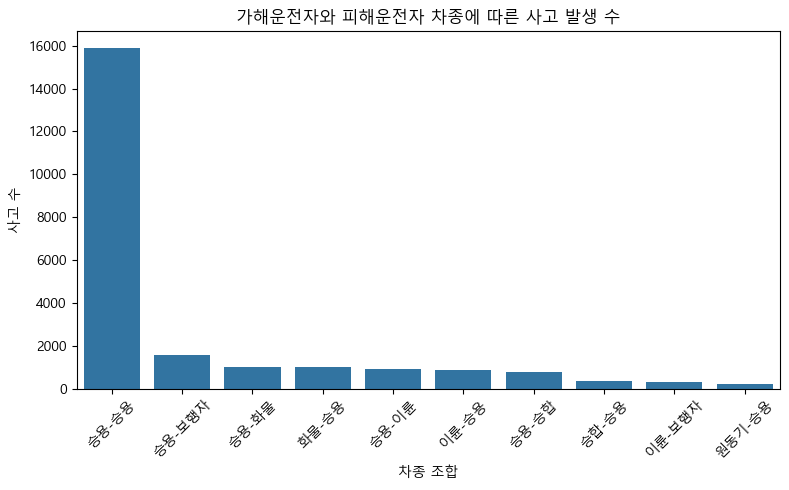

In [ ]:
# 가해운전자-피해운전자의 차종별 그래프
data['차종 조합'] = data['가해운전자 차종'] + '-' + data['피해운전자 차종']

top_combinations = data['차종 조합'].value_counts().nlargest(10).index
plt.figure(figsize=(8, 5))
sns.countplot(x='차종 조합', data=data[data['차종 조합'].isin(top_combinations)], 
              order=top_combinations)
plt.xticks(rotation=45)
plt.title('가해운전자와 피해운전자 차종에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

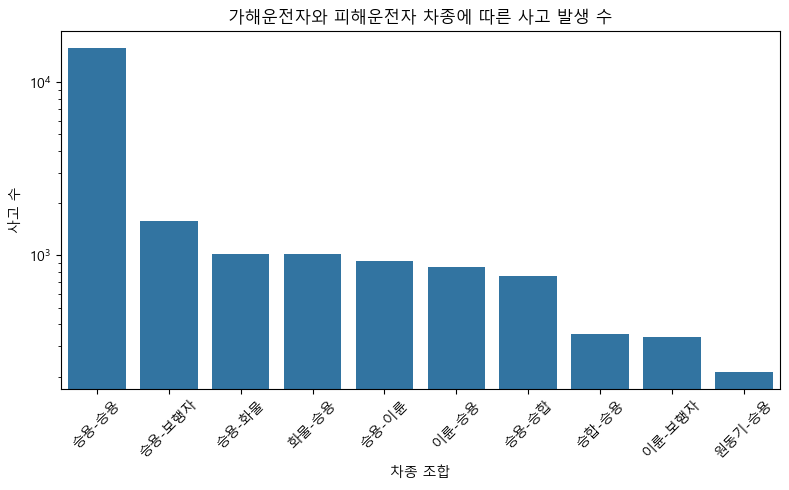

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='차종 조합', data=data[data['차종 조합'].isin(top_combinations)], 
              order=top_combinations)
plt.xticks(rotation=45)
plt.title('가해운전자와 피해운전자 차종에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.yscale('log')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

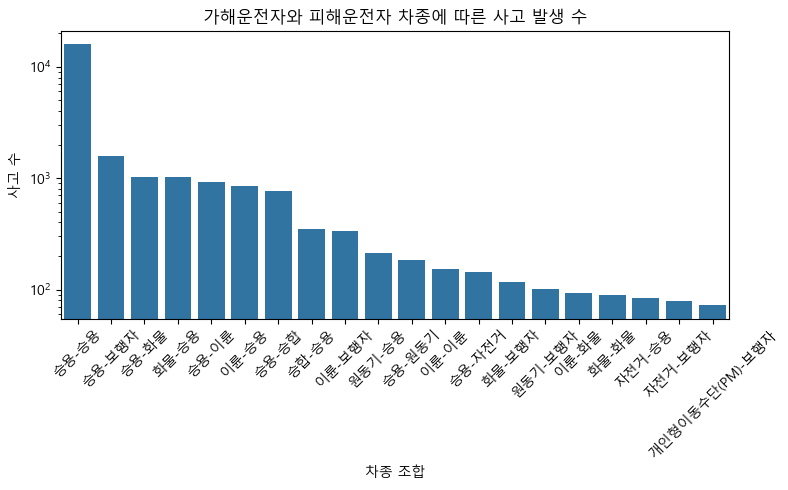

In [ ]:
top_combinations = data['차종 조합'].value_counts().nlargest(20).index

plt.figure(figsize=(8, 5))
sns.countplot(x='차종 조합', data=data[data['차종 조합'].isin(top_combinations)], 
              order=top_combinations)
plt.xticks(rotation=45)
plt.title('가해운전자와 피해운전자 차종에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.yscale('log')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

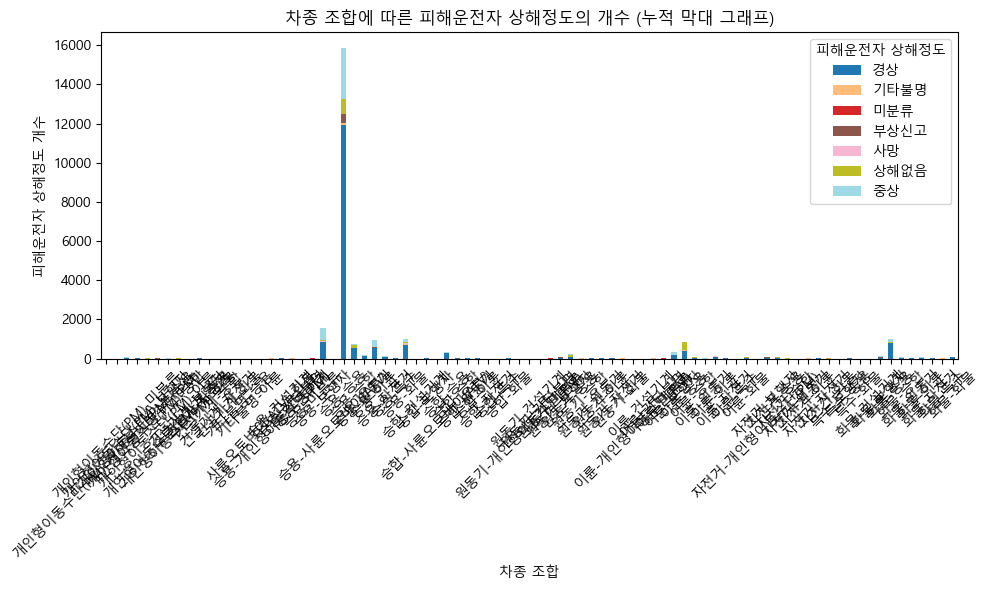

In [ ]:
# 차종 조합별 피해운전자 상해정도의 개수 계산
pivot_table = data.pivot_table(index='차종 조합', columns='피해운전자 상해정도', 
                               aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title('차종 조합에 따른 피해운전자 상해정도의 개수 (누적 막대 그래프)')
plt.xlabel('차종 조합')
plt.ylabel('피해운전자 상해정도 개수')
plt.legend(title='피해운전자 상해정도')
plt.tight_layout()
plt.show()

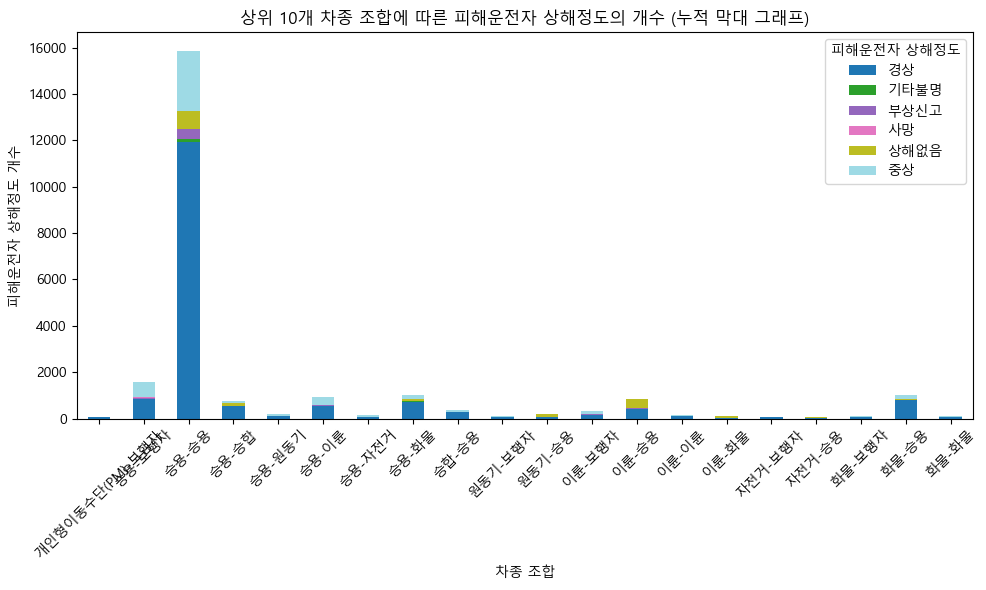

In [ ]:
# 상위 10개의 차종 조합만 필터링
filtered_data = data[data['차종 조합'].isin(top_combinations)]

# 차종 조합별 피해운전자 상해정도의 개수 계산
pivot_table = filtered_data.pivot_table(index='차종 조합', columns='피해운전자 상해정도', 
                                        aggfunc='size', fill_value=0)

# 누적 막대 그래프 그리기
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title('상위 10개 차종 조합에 따른 피해운전자 상해정도의 개수 (누적 막대 그래프)')
plt.xlabel('차종 조합')
plt.ylabel('피해운전자 상해정도 개수')
plt.legend(title='피해운전자 상해정도')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

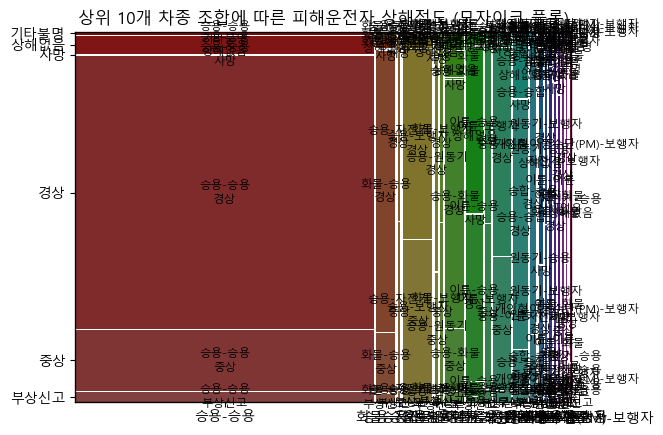

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

filtered_data = data[data['차종 조합'].isin(top_combinations)]

plt.figure(figsize=(12, 6))
mosaic(filtered_data, ['차종 조합', '피해운전자 상해정도'], title='상위 10개 차종 조합에 따른 피해운전자 상해정도 (모자이크 플롯)')
plt.show()